In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datetime as dt
import netCDF4 as cdf
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pylab as plb
from tm5tools import globarea
import calendar

In [3]:
##################################### Dataset Definition: Run1 - SiBCASA-GFED4 ###############################################

# co2_rbo_aircraft-pfp_26_representative.nc - Rio Branco
# co2_tab_aircraft-pfp_26_representative.nc - Tabatinga
# co2_san_aircraft-pfp_26_representative.nc - Santarem
# co2_alf_aircraft-pfp_26_representative.nc - Alta Floresta
# co2_mlo_surface-flask_1_representative.nc - Mauna Loa

directories = ['/Users/botia/mnt/promise/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/',
              '/Users/botia/mnt/promise/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/', 
              '/Users/botia/mnt/promise/CO2/botia/run3_FINN_optbg/analysis/data_molefractions/',
              '/Users/botia/mnt/promise/CO2/botia/run4_casa_gfed4_optbg/analysis/data_molefractions/',
              '/Users/botia/mnt/promise/CO2/botia/run5_casa_gfed4_3h_optbg/analysis/data_molefractions/' 
              ]

#legend = ['Observations','SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h']
legend = ['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h']

In [4]:
### Overview of how many obs were done in each 500 m interval from 0-4500 m
### change site 'tab' etc one the name of the co2 file

f_ex = cdf.Dataset('/Users/botia/mnt/promise/CO2/botia/run7_sibcasa_gfed4_optimized_fsam/analysis/data_molefractions/co2_rbo_aircraft-pfp_26_representative.nc')

alts = f_ex.variables['altitude'][:]
obses = f_ex.variables['value'][:]*1e6               
simus = f_ex.variables['modelsamplesensemble'][:]*1e6
times = f_ex.variables['time_components'][:]

index = np.where(alts<4500)

altura = alts[index] # type numpy array
observs = obses[index]
simulas = simus.sum(axis=1)[index]
alt_sel = set(altura) # type = set 
alt_sel = sorted(alt_sel) # type= list
avg = []
avg_sim = []
obs_bin = []

for h in range(len(alt_sel)):
    obs_same_height = []
    sim_same_height = []
    
    for i in range(len(altura)):
        
        if alt_sel[h] == altura[i]:
                        
            obs_same_height.append(observs[i])
            sim_same_height.append(simulas[i])
    
    obs_bin.append(len(obs_same_height))
    #print alt_sel[h], obs_bin
    
    if alt_sel[h] < 500:
        obs_500 = sum(obs_bin)
    
    if 500 < alt_sel[h] < 1000:
        obs_1000 = sum(obs_bin)-obs_500
        
    if 1000 < alt_sel[h] < 1500:
        obs_1500 = sum(obs_bin)-obs_500-obs_1000
        
    if 1500 < alt_sel[h] < 2000:
        obs_2000 = sum(obs_bin)-obs_500-obs_1000-obs_1500
        
    if 2000 < alt_sel[h] < 2500:
        obs_2500 = sum(obs_bin)-obs_500-obs_1000-obs_1500-obs_2000
        
    if 2500 < alt_sel[h] < 3000:
        obs_3000 = sum(obs_bin)-obs_500-obs_1000-obs_1500-obs_2000-obs_2500
        
    if 3000 < alt_sel[h] < 3500:
        obs_3500 = sum(obs_bin)-obs_500-obs_1000-obs_1500-obs_2000-obs_2500-obs_3000
        
    if 3500 < alt_sel[h] < 4000:
        obs_4000 = sum(obs_bin)-obs_500-obs_1000-obs_1500-obs_2000-obs_2500-obs_3000-obs_3500
    
    if 4000 < alt_sel[h] < 4500:
        obs_4500 = sum(obs_bin)-obs_500-obs_1000-obs_1500-obs_2000-obs_2500-obs_3000-obs_3500-obs_4000
    
print obs_500,obs_1000,obs_1500,obs_2000,obs_2500,obs_3000,obs_3500,obs_4000,obs_4500
        
   

74 158 87 169 85 83 89 159 85


0 /Users/botia/mnt/promise/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
1 /Users/botia/mnt/promise/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
2 /Users/botia/mnt/promise/CO2/botia/run3_FINN_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
3 /Users/botia/mnt/promise/CO2/botia/run4_casa_gfed4_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc
4 /Users/botia/mnt/promise/CO2/botia/run5_casa_gfed4_3h_optbg/analysis/data_molefractions/
co2_rbo_aircraft-pfp_26_representative.nc


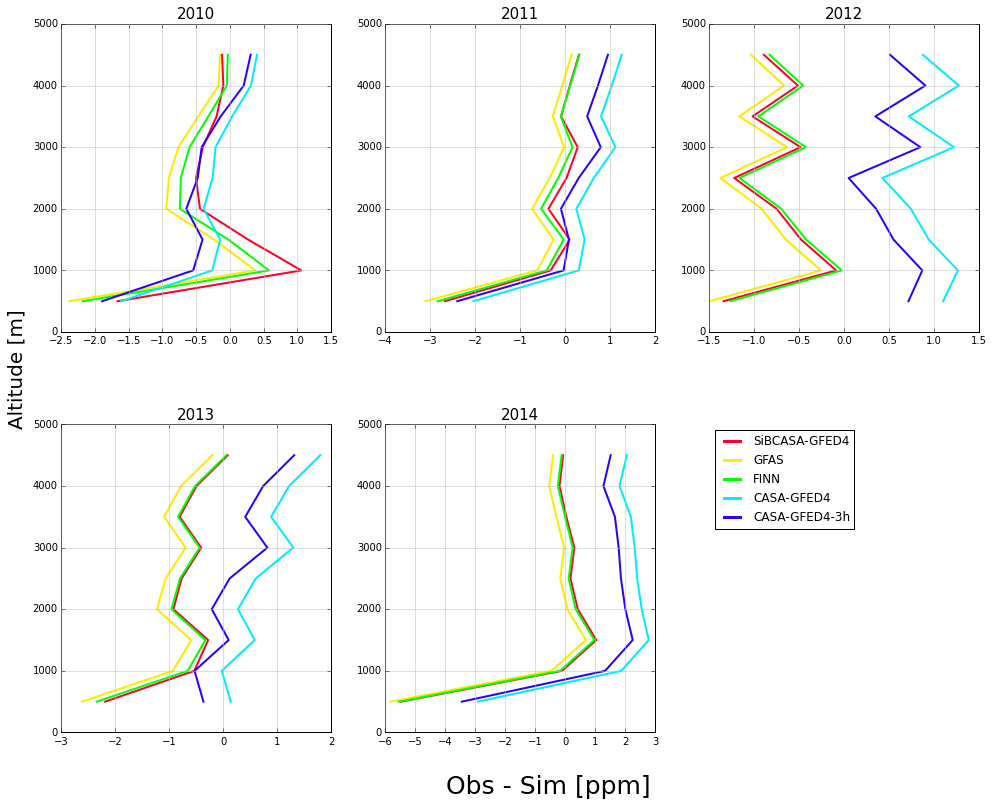

In [5]:
######################################## Bias for San and Rbo

site   = 'rbo'
season = 'wet'
minyear = 2010
maxyear = 2015

fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.5, 'Altitude [m]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.009, 'Obs - Sim [ppm]', ha='center',fontsize=25)

altitude = [500,1000,1500,2000,2500,3000,3500,4000,4500]
colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))

for ii,dirbf in enumerate(directories):
    print ii,dirbf
    for fname in os.listdir(dirbf):
        if fname[4:7] == site:
            print fname
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6               
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates = np.array(dates)
            
            for y in range(minyear,maxyear):
                
                if season == 'all':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y+1,1,1)
                if season == 'wet':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y,8,1)
                if season == 'fire':
                    date_min = dt.datetime(y,8,1)
                    date_max = dt.datetime(y,12,1)
                
                d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))
                
                obs = o[d_index]
                sim = s.sum(axis=1)[d_index]
                alt = a[d_index]
                
                index_500 = np.where(alt<500)
                index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
                index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
                index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
                index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
                index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
                index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
                index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
                index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))
                
                indices = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,
                           index_3500,index_4000,index_4500]    
                
                observations = []
                simulations = []
                error_low = []
                error_high = []
                
                obs_bin = [len(obs[index_500]), len(obs[index_1000]),  len(obs[index_1500]), 
                           len(obs[index_2000]), len(obs[index_2500]), len(obs[index_3000]),
                           len(obs[index_3500]), len(obs[index_4000]), len(obs[index_4500])]
                
                #print y, obs_bin
                
                for j in range(len(indices)):
                    simulations.append((sim[indices[j]]).mean())
                    observations.append((obs[indices[j]]).mean())
        
                if y == 2010:
                    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
                    ax1 = plt.subplot(231)
                    ax1.plot(bias, altitude,'-',color=colors[ii],linewidth=2,markersize=8) 
                    ax1.set_title('2010',fontsize=15)
                    ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                    ax1.set_ylim(0,5000)
                    
                if y == 2011:
                    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
                    ax2 = plt.subplot(232)
                    ax2.plot(bias, altitude,'-',color=colors[ii],linewidth=2,markersize=8) 
                    ax2.set_title('2011',fontsize=15)
                    ax2.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                    ax2.set_ylim(0,5000)
                    
                if y == 2012:
                    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
                    ax3 = plt.subplot(233)
                    ax3.plot(bias, altitude,'-',color=colors[ii],linewidth=2,markersize=8)
                    ax3.set_title('2012',fontsize=15)
                    ax3.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                    ax3.set_ylim(0,5000)
                    
                if y == 2013:
                    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
                    ax4 = plt.subplot(234)
                    ax4.plot(bias, altitude,'-',color=colors[ii],linewidth=2,markersize=8)
                    ax4.set_title('2013',fontsize=15)
                    ax4.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                    ax4.set_ylim(0,5000)
                    
                if y == 2014:
                    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
                    ax5 = plt.subplot(235)
                    ax5.plot(bias, altitude,'-',color=colors[ii],linewidth=2,markersize=8,label=legend[ii])
                    ax5.set_title('2014',fontsize=15)
                    ax5.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                    ax5.set_ylim(0,5000)
                    #ax5.legend(loc='upper left')
                    t1 = [0]*9
                    t2 = [0]*9
                    ax6 = plt.subplot(236)
                    ax6.plot(t1,t2,'-',linewidth=3,color=colors[ii],label=legend[ii])
                    ax6.legend(loc='upper left')
                    ax6.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
                    ax6.tick_params(axis='y', which='both',left='off',right='off',labelleft='off')
                    ax6.spines['right'].set_color('none')
                    ax6.spines['left'].set_color('none')
                    ax6.spines['bottom'].set_color('none')
                    ax6.spines['top'].set_color('none')
                    
if season == 'wet': fig.savefig('%s_bias_Wet.png'%(site),bbox_inches='tight',DPI=1000)
if season == 'fire': fig.savefig('%s_bias_Fire.png'%(site),bbox_inches='tight',DPI=1000)

0 /Users/botia/mnt/promise/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/
co2_tab_aircraft-pfp_26_representative.nc
1 /Users/botia/mnt/promise/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/
co2_tab_aircraft-pfp_26_representative.nc
2 /Users/botia/mnt/promise/CO2/botia/run3_FINN_optbg/analysis/data_molefractions/
co2_tab_aircraft-pfp_26_representative.nc
3 /Users/botia/mnt/promise/CO2/botia/run4_casa_gfed4_optbg/analysis/data_molefractions/
co2_tab_aircraft-pfp_26_representative.nc
4 /Users/botia/mnt/promise/CO2/botia/run5_casa_gfed4_3h_optbg/analysis/data_molefractions/
co2_tab_aircraft-pfp_26_representative.nc


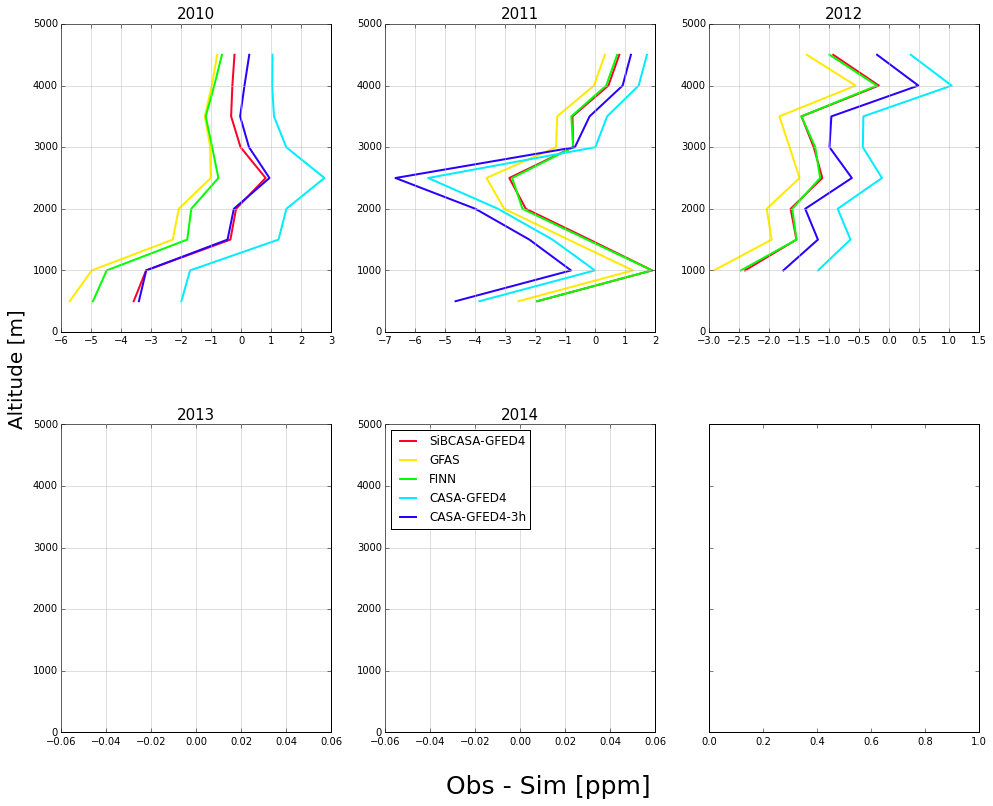

In [8]:
############ Tabatinga all products Fire season
site = 'tab'
season = 'fire'

minyear = 2010
maxyear = 2015

fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.5, 'Altitude [m]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.009, 'Obs - Sim [ppm]', ha='center',fontsize=25)

altitude = [500,1000,1500,2000,2500,3000,3500,4000,4500]
colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))

for ii,dirbf in enumerate(directories):
    print ii,dirbf
    for fname in os.listdir(dirbf):
        if fname[4:7] == site:
            print fname
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6               
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates = np.array(dates)
            
            for y in range(minyear,maxyear):
                
                if season == 'all':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y+1,1,1)
                if season == 'wet':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y,8,1)
                if season == 'fire':
                    date_min = dt.datetime(y,8,1)
                    date_max = dt.datetime(y,12,1)
                
                d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))
                
                obs = o[d_index]
                sim = s.sum(axis=1)[d_index]
                alt = a[d_index]
                
                index_500 = np.where(alt<500)
                index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
                index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
                index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
                index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
                index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
                index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
                index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
                index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))
                
                indices = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,
                           index_3500,index_4000,index_4500]    
                
                if y == 2012: 
                    obs[index_500] = nan   #np.delete(obs,index_500)
                    sim[index_500] = nan
                
                obs_bin = [len(obs[index_500]), len(obs[index_1000]),  len(obs[index_1500]), 
                           len(obs[index_2000]), len(obs[index_2500]), len(obs[index_3000]),
                           len(obs[index_3500]), len(obs[index_4000]), len(obs[index_4500])]
                
                #print y, obs_bin
                simulations = []
                observations = []
                
                for j in range(len(indices)):
                    simulations.append((sim[indices[j]]).mean())
                    observations.append((obs[indices[j]]).mean())
        
                if y == 2010:
                    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
                    ax1 = plt.subplot(231)
                    ax1.plot(bias, altitude,'-',color=colors[ii],linewidth=2,markersize=8) 
                    ax1.set_title('%i'%(y),fontsize=15)
                    ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                    ax1.set_ylim(0,5000)
                    
                if y == 2011:
                    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
                    ax2 = plt.subplot(232)
                    ax2.plot(bias, altitude,'-',color=colors[ii],linewidth=2,markersize=8) 
                    ax2.set_title('%i'%(y),fontsize=15)
                    ax2.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                    ax2.set_ylim(0,5000)
                    
                if y == 2012:
                    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
                    ax3 = plt.subplot(233)
                    ax3.plot(bias, altitude,'-',color=colors[ii],linewidth=2,markersize=8)
                    ax3.set_title('%i'%(y),fontsize=15)
                    ax3.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                    ax3.set_ylim(0,5000)
                    
                if y == 2013:
                    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
                    ax4 = plt.subplot(234)
                    ax4.plot(bias, altitude,'-',color=colors[ii],linewidth=2,markersize=8)
                    ax4.set_title('%i'%(y),fontsize=15)
                    ax4.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                    ax4.set_ylim(0,5000)
                    
                if y == 2014:
                    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
                    ax5 = plt.subplot(235)
                    ax5.plot(bias, altitude,'-',color=colors[ii],linewidth=2,markersize=8,label=legend[ii])
                    ax5.set_title('%i'%(y),fontsize=15)
                    ax5.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                    ax5.set_ylim(0,5000)
                    ax5.legend(loc='upper left')
                    
    if season == 'wet': fig.savefig('Tab_bias_Wet.png',bbox_inches='tight',DPI=1000)
    if season == 'fire': fig.savefig('Tab_bias_Fire.png',bbox_inches='tight',DPI=1000)

0 /Users/botia/mnt/promise/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/
co2_alf_aircraft-pfp_26_representative.nc
1 /Users/botia/mnt/promise/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/
co2_alf_aircraft-pfp_26_representative.nc
2 /Users/botia/mnt/promise/CO2/botia/run3_FINN_optbg/analysis/data_molefractions/
co2_alf_aircraft-pfp_26_representative.nc
3 /Users/botia/mnt/promise/CO2/botia/run4_casa_gfed4_optbg/analysis/data_molefractions/
co2_alf_aircraft-pfp_26_representative.nc
4 /Users/botia/mnt/promise/CO2/botia/run5_casa_gfed4_3h_optbg/analysis/data_molefractions/
co2_alf_aircraft-pfp_26_representative.nc


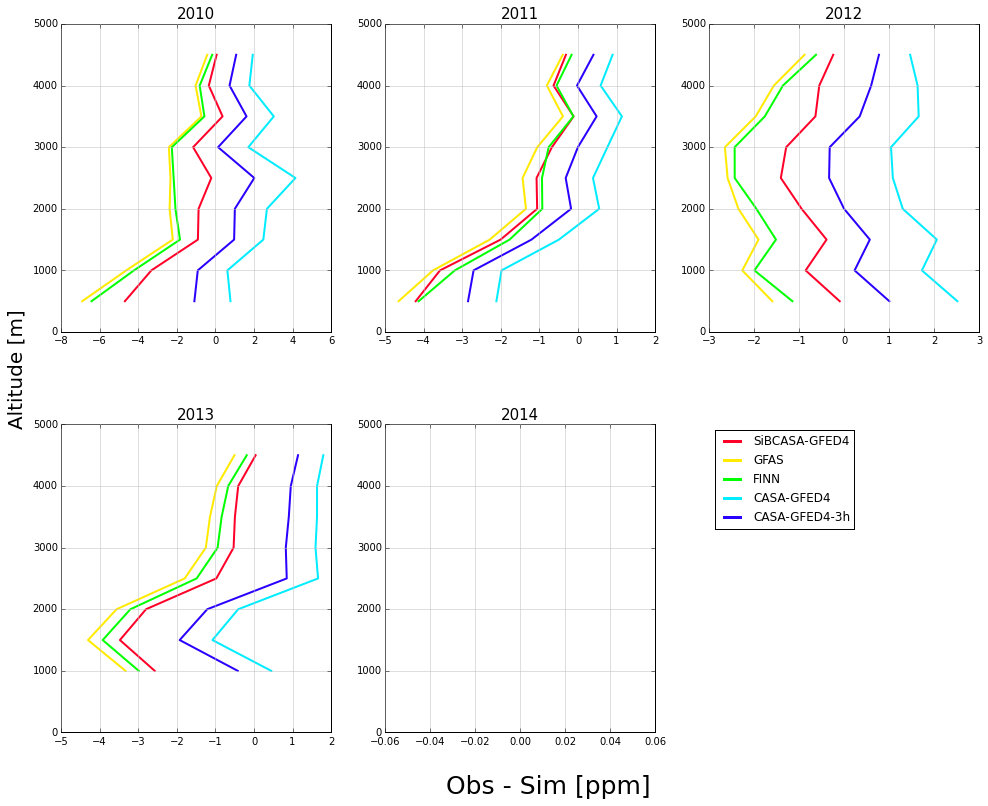

In [14]:
############################# Alta Floresta all products fire season
site = 'alf'
season = 'fire'

minyear = 2010
maxyear = 2015

fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0, 0.5, 'Altitude [m]', va='center', rotation='vertical',fontsize=20)
fig.text(0.5, 0.009, 'Obs - Sim [ppm]', ha='center',fontsize=25)

altitude = [500,1000,1500,2000,2500,3000,3500,4000,4500]

for ii,dirbf in enumerate(directories):
    print ii,dirbf
    for fname in os.listdir(dirbf):
        if fname[4:7] == site:
            print fname
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6               
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates = np.array(dates)
            
            for y in range(minyear,maxyear):
                
                if season == 'all':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y+1,1,1)
                if season == 'wet':
                    date_min = dt.datetime(y,1,1)
                    date_max = dt.datetime(y,8,1)
                if season == 'fire':
                    date_min = dt.datetime(y,8,1)
                    date_max = dt.datetime(y,12,1)
                
                d_index = np.where(np.logical_and(dates>=date_min,dates<date_max))
                
                obs = o[d_index]
                sim = s.sum(axis=1)[d_index]
                alt = a[d_index]
                
                index_500 = np.where(alt<500)
                index_1000 = np.where(np.logical_and(alt>=500,alt<1000))
                index_1500 = np.where(np.logical_and(alt>=1000,alt<1500))
                index_2000 = np.where(np.logical_and(alt>=1500,alt<2000))
                index_2500 = np.where(np.logical_and(alt>=2000,alt<2500))
                index_3000 = np.where(np.logical_and(alt>=2500,alt<3000))
                index_3500 = np.where(np.logical_and(alt>=3000,alt<3500))
                index_4000 = np.where(np.logical_and(alt>=3500,alt<4000))
                index_4500 = np.where(np.logical_and(alt>=4000,alt<4500))
                
                indices = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,
                           index_3500,index_4000,index_4500]    
                
                observations = []
                simulations = []
                error_low = []
                error_high = []
                
                obs_bin = [len(obs[index_500]), len(obs[index_1000]),  len(obs[index_1500]), 
                           len(obs[index_2000]), len(obs[index_2500]), len(obs[index_3000]),
                           len(obs[index_3500]), len(obs[index_4000]), len(obs[index_4500])]
                
                #print y, obs_bin
                
                for j in range(len(indices)):
                    simulations.append((sim[indices[j]]).mean())
                    observations.append((obs[indices[j]]).mean())
        
                if y == 2010:
                    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
                    ax1 = plt.subplot(231)
                    ax1.plot(bias, altitude,'-',color=colors[ii],linewidth=2,markersize=8) 
                    ax1.set_title('%i'%(y),fontsize=15)
                    ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                    ax1.set_ylim(0,5000)
                    
                if y == 2011:
                    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
                    ax2 = plt.subplot(232)
                    ax2.plot(bias, altitude,'-',color=colors[ii],linewidth=2,markersize=8) 
                    ax2.set_title('%i'%(y),fontsize=15)
                    ax2.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                    ax2.set_ylim(0,5000)
                    
                if y == 2012:
                    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
                    ax3 = plt.subplot(233)
                    ax3.plot(bias, altitude,'-',color=colors[ii],linewidth=2,markersize=8)
                    ax3.set_title('%i'%(y),fontsize=15)
                    ax3.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                    ax3.set_ylim(0,5000)
                    
                if y == 2013:
                    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
                    ax4 = plt.subplot(234)
                    ax4.plot(bias, altitude,'-',color=colors[ii],linewidth=2,markersize=8)
                    ax4.set_title('%i'%(y),fontsize=15)
                    ax4.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                    ax4.set_ylim(0,5000)
                    
                if y == 2014:
                    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
                    ax5 = plt.subplot(235)
                    ax5.plot(bias, altitude,'-',color=colors[ii],linewidth=2,markersize=8,label=legend[ii])
                    ax5.set_title('%i'%(y),fontsize=15)
                    ax5.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
                    ax5.set_ylim(0,5000)
                    #ax5.legend(loc='upper left')
                    t1 = [0]*9
                    t2 = [0]*9
                    ax6 = plt.subplot(236)
                    ax6.plot(t1,t2,'-',linewidth=3,color=colors[ii],label=legend[ii])
                    ax6.legend(loc='upper left')
                    ax6.tick_params(axis='x', which='both',bottom='off',top='off',labelbottom='off')
                    ax6.tick_params(axis='y', which='both',left='off',right='off',labelleft='off')
                    ax6.spines['right'].set_color('none')
                    ax6.spines['left'].set_color('none')
                    ax6.spines['bottom'].set_color('none')
                    ax6.spines['top'].set_color('none')
                    
if season == 'wet': fig.savefig('Alf_bias_Wet.png',bbox_inches='tight',DPI=1000)
if season == 'fire': fig.savefig('Alf_bias_Fire.png',bbox_inches='tight',DPI=1000)

0 /Storage/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/
co2_san_aircraft-pfp_26_representative.nc
1 /Storage/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/
co2_san_aircraft-pfp_26_representative.nc
2 /Storage/CO2/botia/run3_FINN_optbg/analysis/data_molefractions/
co2_san_aircraft-pfp_26_representative.nc
3 /Storage/CO2/botia/run4_casa_gfed4_optbg/analysis/data_molefractions/
co2_san_aircraft-pfp_26_representative.nc
4 /Storage/CO2/botia/run5_casa_gfed4_3h_optbg/analysis/data_molefractions/
co2_san_aircraft-pfp_26_representative.nc


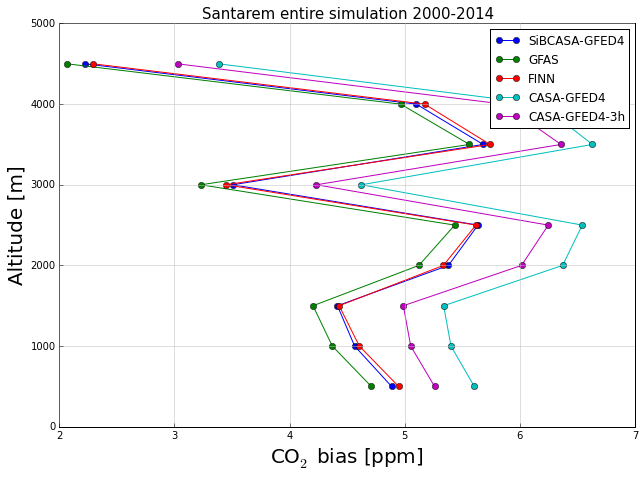

In [10]:
########################## Santarem entire simulation 2000-2014
site = 'san'

fig = plt.figure(1,figsize=(10,8))
ax1 = fig.add_axes([0.1,0.2,0.8,0.7])
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

altitude = [500,1000,1500,2000,2500,3000,3500,4000,4500]
legend=['SiBCASA-GFED4','GFAS','FINN','CASA-GFED4','CASA-GFED4-3h']

for ii,dirbf in enumerate(directories):
    print ii,dirbf
    #for y in range(minyear,maxyear):
    for fname in os.listdir(dirbf):
        if fname[4:7] == site:
            print fname
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6               
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            # indices to group per altitude 
            
            index_500 = np.where(a<500)
            index_1000 = np.where(np.logical_and(a>=500,a<1000))
            index_1500 = np.where(np.logical_and(a>=1000,a<1500))
            index_2000 = np.where(np.logical_and(a>=1500,a<2000))
            index_2500 = np.where(np.logical_and(a>=2000,a<2500))
            index_3000 = np.where(np.logical_and(a>=2500,a<3000))
            index_3500 = np.where(np.logical_and(a>=3000,a<3500))
            index_4000 = np.where(np.logical_and(a>=3500,a<4000))
            index_4500 = np.where(np.logical_and(a>=4000,a<4500))
            
            indices = [index_500,index_1000,index_1500,index_2000,index_2500,index_3000,
                       index_3500,index_4000,index_4500]
            observations = []
            simulations = []
            error_low = []
            error_high = []
            
            for i in range(len(indices)):
                observations.append((o[indices[i]]).mean())
                simulations.append((s.sum(axis=1)[indices[i]]).mean())
                
            dates = []
            for i in time:
                #print dt.datetime(*i)
                dates.append(dt.datetime(*i))
            dates = np.array(dates)   
    
    bias = [simulations - observations for (observations, simulations) in zip(observations, simulations)]
    ax1.plot(bias,altitude,'-o',label=legend[ii])
ax1.set_ylim(0,5000)
ax1.set_title('Santarem entire simulation 2000-2014',fontsize=15)
ax1.grid(True, ls='-', color='0.75') # setting the grid and the color on a grey scale
ax1.set_xlabel('CO$_2$ bias [ppm]',fontsize=20)
ax1.set_ylabel('Altitude [m]',fontsize=20)
ax1.legend(loc='upper right')

In [10]:
bio = f2.variables['bio_flux_opt'][:]
ff = f2.variables['fossil_flux_imp'][:]
fire = f2.variables['fire_flux_imp'][:]

print shape(bio), shape(ff), type(bio), type(ff)

(1, 180, 360) (1, 180, 360) <type 'numpy.ndarray'> <type 'numpy.ndarray'>


In [12]:
f = cdf.Dataset('/Storage/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_amazon_yearly/amazon_fluxes.2010.nc')


In [13]:
value = f.variables['fire_flux_imp'][:]*12/1e15*365*86400
value

array([[ 0.53683061]])